In [1]:
import warnings
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
import pandas as pd
import numpy as pd
from sklearn.preprocessing import StandardScaler

warnings.simplefilter("ignore")
mnist = fetch_openml("mnist_784")

In [2]:
mnist.data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
print(mnist.target.shape)
print(mnist.data.shape)

(70000,)
(70000, 784)


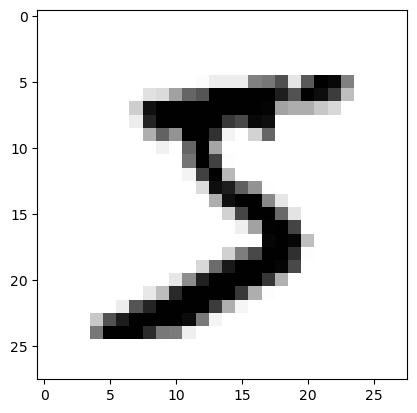

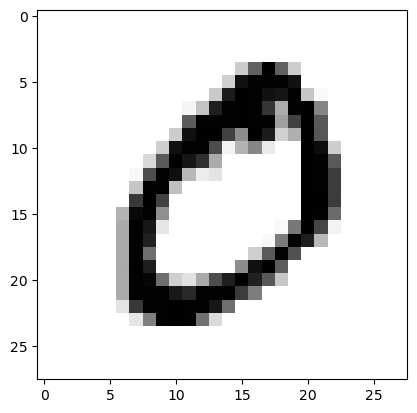

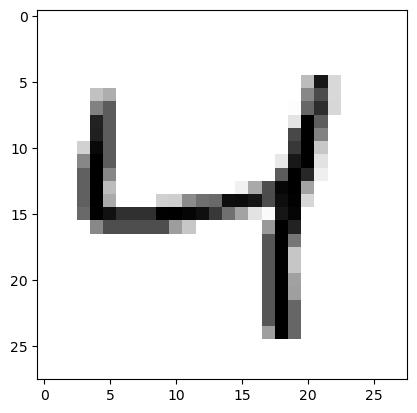

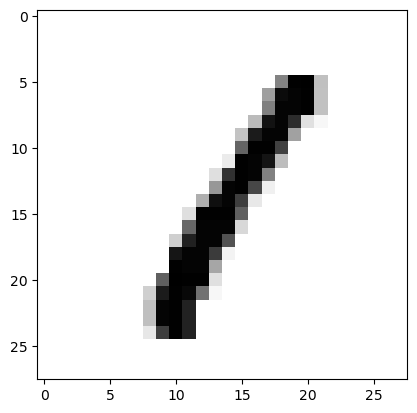

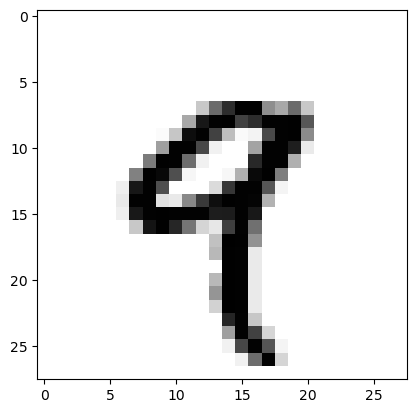

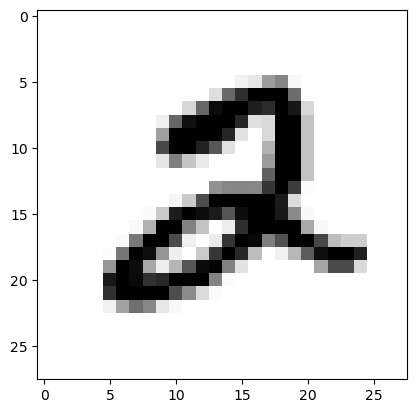

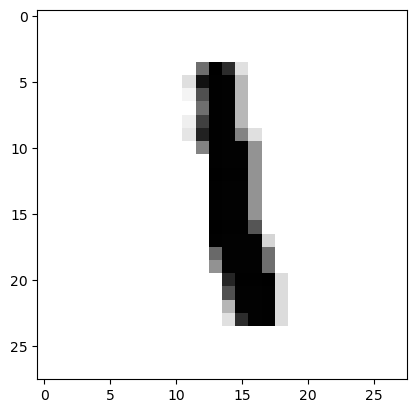

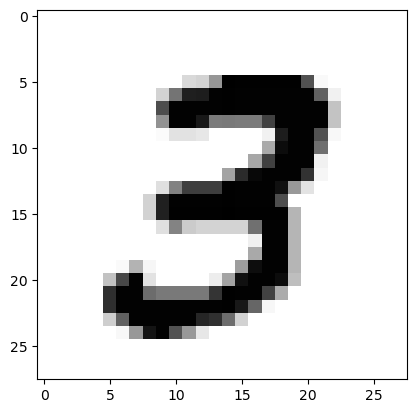

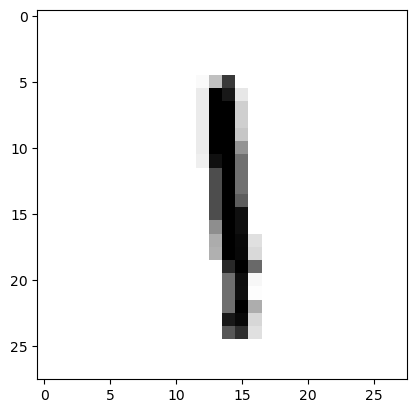

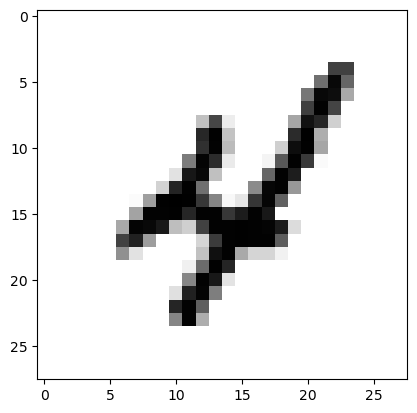

In [5]:
import matplotlib.pyplot as plt

lotImage = mnist.data.to_numpy()

for i in range(10):
    plt.imshow((lotImage[i].reshape(28,28)), cmap=plt.cm.gray_r)
    plt.show()
    

In [3]:
import time 
from sklearn.metrics import accuracy_score

#faire un PCA REDUCTION DE DIMENSION 

X_train = mnist.data[:60000]
X_test = mnist.data[60000:]
y_train = mnist.target[:60000]
y_test = mnist.target[60000:]

print("X_train : ", len(X_train), " y_train : ", len(y_train))
print("X_test : ", len(X_test), " y_test : ", len(y_test))

X_train :  60000  y_train :  60000
X_test :  10000  y_test :  10000


In [52]:
start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train, y_train)
prediction = mlp.predict(X_test)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

0.9645
--- 68.95865154266357 seconds ---


In [4]:
scaler = StandardScaler()
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

start_time = time.time()
mlp = MLPClassifier()
mlp.fit(X_train_scaler, y_train)
prediction = mlp.predict(X_test_scaler)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

0.9736
--- 50.56427550315857 seconds ---


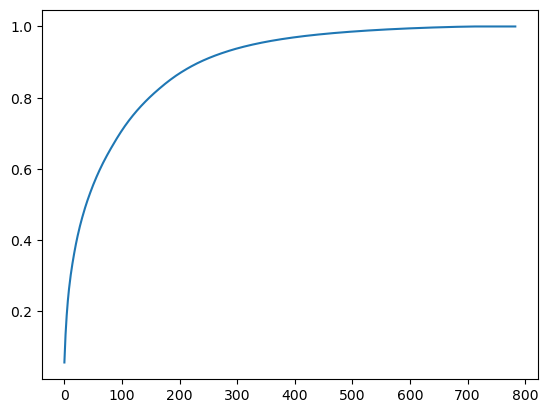

In [8]:
from sklearn.decomposition import PCA
import numpy as np

pca = PCA(n_components=784)
X_train_reduction_scaler = pca.fit_transform(X_train_scaler)
plt.plot(np.cumsum(pca.explained_variance_ratio_))

In [9]:
pca = PCA(n_components=500)
X_train_reduction_scaler = pca.fit_transform(X_train_scaler)

parametres = {'hidden_layer_sizes':[(50,),(50,50),(50,50,50)],
             'alpha':[0.0000001,0.000001,0.00001,0.0001,0.001,0.01,0.1],
             'learning_rate':["constant","invscaling","adaptive"]}

mlp_clf = MLPClassifier()
gridS_mlp = GridSearchCV(mlp_clf, parametres, cv=2, n_jobs=-1)
gridS_mlp.fit(X_train_reduction_scaler, y_train)

GridSearchCV(cv=2, estimator=MLPClassifier(), n_jobs=-1,
             param_grid={'alpha': [1e-07, 1e-06, 1e-05, 0.0001, 0.001, 0.01,
                                   0.1],
                         'hidden_layer_sizes': [(50,), (50, 50), (50, 50, 50)],
                         'learning_rate': ['constant', 'invscaling',
                                           'adaptive']})

In [10]:
print(gridS_mlp.best_params_)

{'alpha': 0.1, 'hidden_layer_sizes': (50,), 'learning_rate': 'invscaling'}


In [23]:
start_time = time.time()
mlp = MLPClassifier(hidden_layer_sizes = (50,), alpha =0.1 ,learning_rate = "invscaling")
mlp.fit(X_train_scaler, y_train)
prediction = mlp.predict(X_test_scaler)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

0.9761
--- 214.3872811794281 seconds ---


In [25]:
MaximumScore = 0

for i in range(0,10):
    print(i)
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (100,), alpha =0.1 ,learning_rate = "invscaling")
    mlp.fit(X_train_scaler, y_train)
    prediction = mlp.predict(X_test_scaler)
    
    if MaximumScore < accuracy_score(y_test, prediction):
        MaximumScore = accuracy_score(y_test, prediction)
        print(accuracy_score(y_test, prediction))
        print("--- %s seconds ---" % (time.time() - start_time))

0
0.975
--- 81.52837014198303 seconds ---
1
0.9759
--- 86.96152830123901 seconds ---
2
0.9777
--- 200.5127968788147 seconds ---
3
0.9791
--- 175.0791449546814 seconds ---
4
5
6
7
8
9


In [26]:
MaximumScore = 0

for i in range(0,5):
    print(i)
    start_time = time.time()
    mlp = MLPClassifier(hidden_layer_sizes = (500,), alpha =0.1 ,learning_rate = "invscaling")
    mlp.fit(X_train_scaler, y_train)
    prediction = mlp.predict(X_test_scaler)
    
    if MaximumScore < accuracy_score(y_test, prediction):
        MaximumScore = accuracy_score(y_test, prediction)
        print(accuracy_score(y_test, prediction))
        print("--- %s seconds ---" % (time.time() - start_time))

0
0.9792
--- 305.7928705215454 seconds ---
1
2
3
0.9795
--- 625.4932098388672 seconds ---
4
0.9796
--- 529.3072807788849 seconds ---


In [7]:
start_time = time.time()
mlp=MLPClassifier(random_state=1, max_iter=200, hidden_layer_sizes=(500,),learning_rate = "invscaling")
mlp.fit(X_train_scaler, y_train)
prediction = mlp.predict(X_test_scaler)
print(accuracy_score(y_test, prediction))
print("--- %s seconds ---" % (time.time() - start_time))

0.9799
--- 180.79276251792908 seconds ---
